# Way of transport of export and import by month and year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

### FALTA TITULO

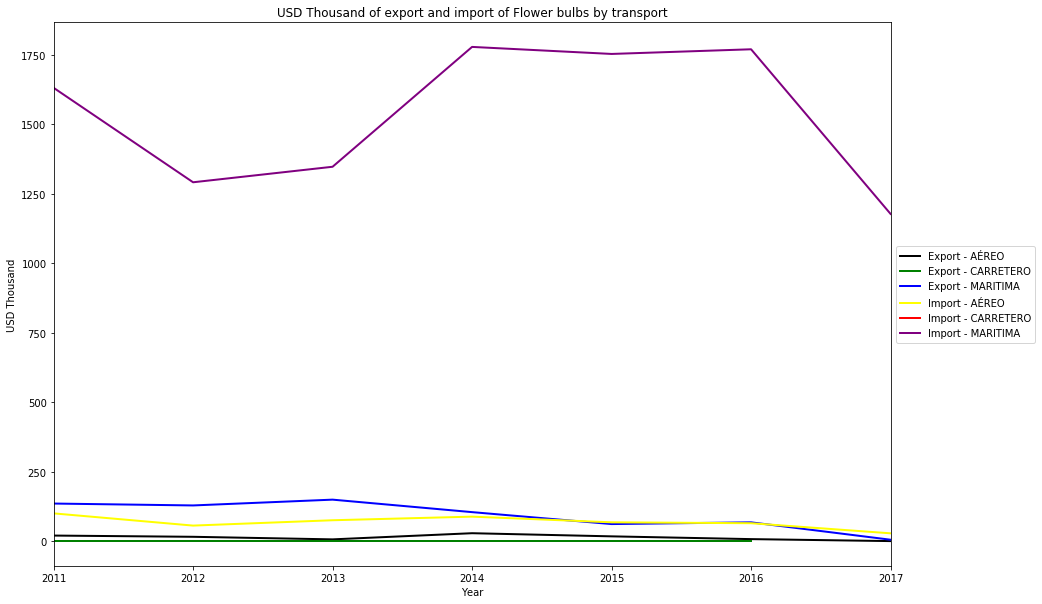

               EXPORT                           IMPORT                       
TRANSPORTE      AÉREO CARRETERO    MARÍTIMA      AÉREO CARRETERO     MARÍTIMA
YEAR                                                                         
2011        198950.75       0.0  1350924.17  997621.01       NaN  16312103.30
2012        154505.75       0.0  1282856.04  557737.28       NaN  12912177.85
2013         62039.74       0.0  1491459.82  750116.26       NaN  13470462.13
2014        283578.73       0.0  1042157.52  879852.33       NaN  17783328.32
2015        170483.52       0.0   612593.41  675756.00       NaN  17530167.90
2016         70991.16       0.0   674595.11  643144.70       NaN  17698011.94
2017             0.00       NaN    48970.35  279726.20       NaN  11773089.37


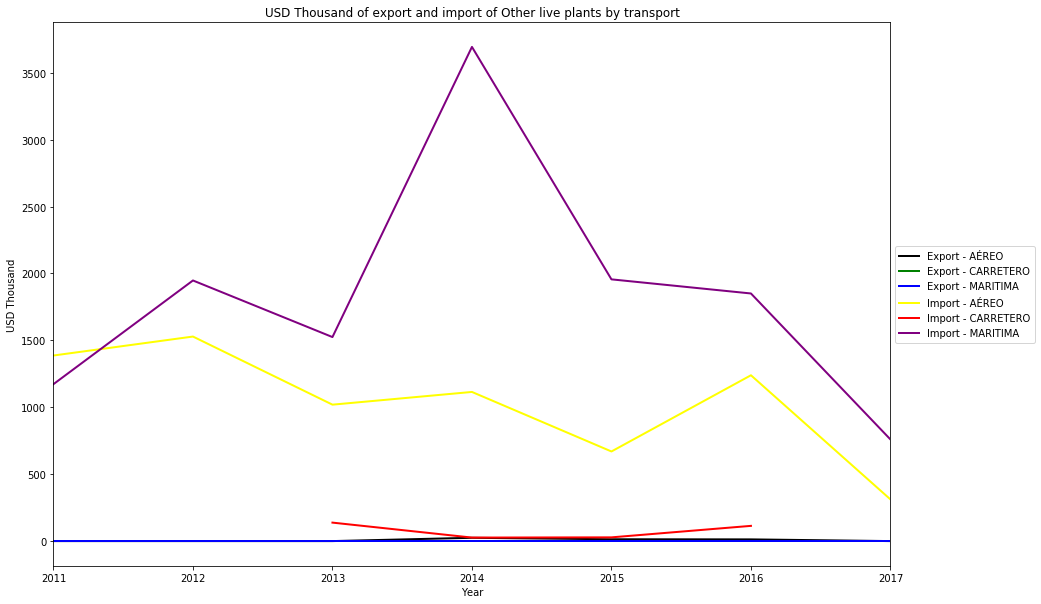

              EXPORT                         IMPORT                      
TRANSPORTE     AÉREO CARRETERO MARÍTIMA       AÉREO CARRETERO    MARÍTIMA
YEAR                                                                     
2011            0.00       0.0      0.0  1386683.59    7680.0  1172548.88
2012            0.00       NaN      0.0  1528357.10       NaN  1947356.48
2013            0.00       NaN      0.0  1019423.97  138060.0  1524486.52
2014        24665.12       NaN      0.0  1114455.37   26240.0  3692532.63
2015        13638.10       NaN      0.0   669651.18   27885.0  1955686.97
2016        12735.00       NaN      0.0  1239068.90  113780.0  1850185.04
2017            0.00       NaN      0.0   311480.91       NaN   759394.84


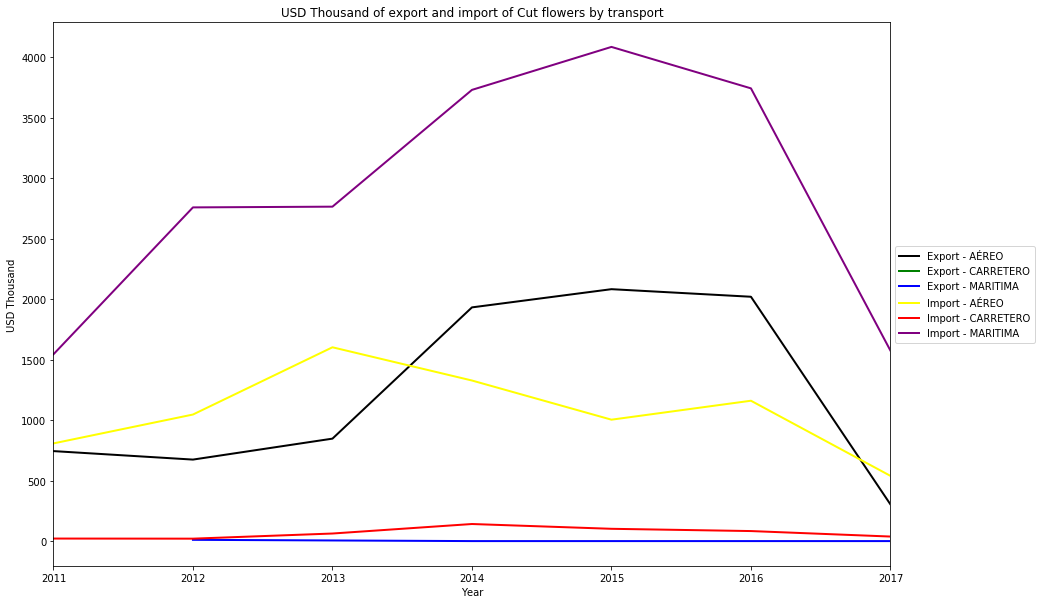

                 EXPORT                            IMPORT                         
TRANSPORTE        AÉREO CARRETERO   MARÍTIMA        AÉREO   CARRETERO     MARÍTIMA
YEAR                                                                              
2011         7437910.00       NaN        NaN   8074948.51   209553.54  15438636.84
2012         6736551.28       NaN  104343.20  10460467.24   200898.35  27581674.30
2013         8467881.84       NaN   52114.62  16019278.14   625618.00  27641850.11
2014        19317204.54       NaN       0.00  13272807.81  1411679.28  37293693.05
2015        20821927.73       NaN       0.00  10035111.59  1015779.00  40846350.43
2016        20195854.00       NaN       0.00  11601525.55   829056.00  37420418.56
2017         3031090.21       NaN       0.00   5390918.59   375789.00  15742197.40


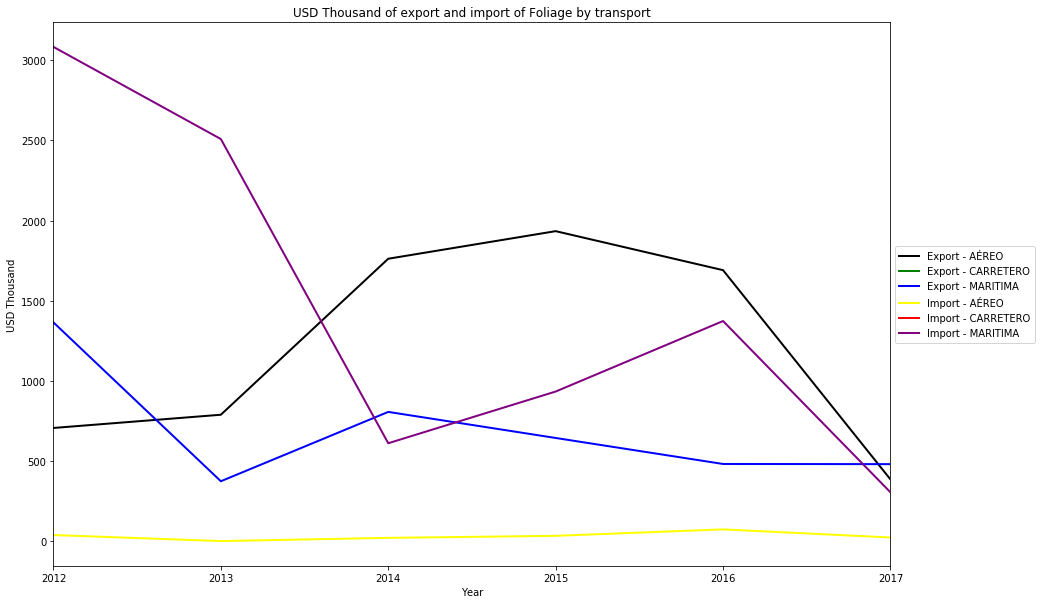

                EXPORT                          IMPORT                      
TRANSPORTE       AÉREO CARRETERO    MARÍTIMA     AÉREO CARRETERO    MARÍTIMA
YEAR                                                                        
2012         707420.64       NaN  1365579.14  39764.86       NaN  3083422.30
2013         789863.98       NaN   375177.72   2004.54       NaN  2508990.21
2014        1762642.97       NaN   807542.01  22120.54  11276.52   612160.21
2015        1934615.35       NaN   644984.32  34789.75       NaN   934556.76
2016        1691350.20       NaN   482898.89  75033.59       NaN  1374088.75
2017         386633.02       NaN   481786.98  24432.78       NaN   306231.93


In [163]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR", "VALORCIF", "VIATRANSPORTE", "GROUP"]
usecols_import =  ["YEAR", "FOB", "VIA_TRAN", "GROUP"]

data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)

data_export.columns = ['TRANSPORTE', 'EXPORT', 'YEAR', "GROUP"]
data_import.columns = ['TRANSPORTE', 'IMPORT', 'YEAR', "GROUP"]

final_data = pd.concat([data_import, data_export])


for group, scale,text in [("Flower bulbs",      np.linspace(0, 1750, 8), "Thousand"),
                          ("Other live plants", np.linspace(0, 3500, 8),  "Thousand"),
                          ("Cut flowers",       np.linspace(0, 4000, 9),  "Thousand"),
                          ("Foliage",           np.linspace(0, 3000, 7),  "Thousand")]:
    
    temporal_data = final_data[final_data["GROUP"] == group]
    
    new_data_grouper = temporal_data.groupby(['YEAR','TRANSPORTE']).sum()

    plot = new_data_grouper.unstack().plot(kind='line', figsize=(15, 10), linewidth=2.0,
                                           color=["black", "green", "blue","yellow", "red", "purple"])

    plot.set_title("USD {} of export and import of {} by transport".format(text, group))
    plot.set_xlabel("Year")
    plot.set_ylabel("USD {}".format(text))

    plot.legend(["Export - AÉREO", "Export - CARRETERO", "Export - MARITIMA",
                 "Import - AÉREO", "Import - CARRETERO", "Import - MARITIMA"],
                loc='center left', bbox_to_anchor=(1.0, 0.5))


    plot.set_yticklabels([""] + [str(int(x)) for x in scale])
    plt.subplots_adjust(hspace=0.3)

    plt.show()
    print(new_data_grouper.unstack().to_string())